# DEFINIÇÃO DO PROBLEMA A SER RESOLVIDO


Este projeto visa fazer análise explorátoria de dados hipotéticos provenientes de RH e, após, gerar gráficos onde se possa ter as seguintes respostas:

     1 - Qual a correlação entre atributos dos funcionários?
     2 - Qual o tempo de serviço da maioria dos funcionários?
     3 - Qual a distribuição de idades de funcionários?
     4 - Qual o número de treinamentos mais frequentes?
     5 - Qual a proporção de funcionários por canal de recrutamento?

In [211]:
#Primeiro vamos instalar o pacote watermark 
#Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook

!pip install -q -U watermark

In [212]:
#Importando pacotes relevantes para o projeto

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [213]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.0.5
numpy     : 1.19.1
seaborn   : 0.11.1
matplotlib: 3.3.4



# Importando os Dados

In [214]:
#Importando arquivo csv

df = pd.read_csv ("dadosRH.csv")

In [215]:
#Mostrando o cabeçalho

df.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [216]:
#Mostrando últimos registros

df.tail()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
54803,3030,Tecnologia,Sudeste,Superior,M,Outsourcing,1,48,3.0,17,0
54804,74592,Logistica,Nordeste,Mestrado ou Doutorado,F,Outro,1,37,2.0,6,0
54805,13918,Analytics,Sudeste,Superior,M,Outro,1,27,5.0,3,0
54806,13614,Marketing,Nordeste,NaN,M,Outsourcing,1,29,1.0,2,0
54807,51526,RH,Nordeste,Superior,M,Outro,1,27,1.0,5,0


In [217]:
#Informação do Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  int64  
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             52399 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    50684 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


# Análise Exploratória, Limpeza e Transformação de Dados

In [218]:
#Mostrando variáveis com valores nulos

df.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [219]:
#Visualizando dados pelo grupo educação

df.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

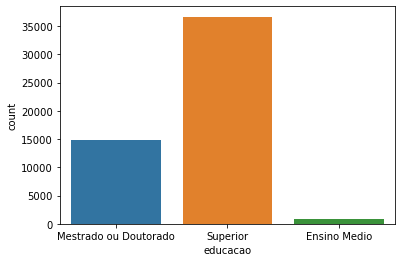

In [220]:
#Utilzando da biblioteca seaborn para mostrar a relação de pessoas por escolaridade na empresa

sns.countplot(df['educacao'])

In [222]:
#Visualizando dados pelo grupo de avaliação do ano anterior

df.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

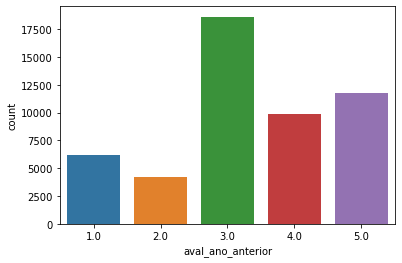

In [223]:
#Expondo em gráfico os valores referentes aos canais de recrutamento dos funcionários
#Pode-se fazer diversas análises para todos os campos envolvidos

sns.countplot(x = "aval_ano_anterior", data = df)

Preenchimento de valores ausentes

In [224]:
#Vamos substituir os valores ausentes na coluna Educação pela moda desta mesma coluna
#Ou seja, o valor mais presente nessa variável

df['educacao'].fillna(df['educacao'].mode()[0], inplace = True)

In [225]:
#Substituiremos os valores ausentes na coluna Aval ano anterior pela média dos valores nesta coluna

df['aval_ano_anterior'].fillna(df['aval_ano_anterior'].mean(), inplace  = True)

In [226]:
#Conferindo se as células em branco foram preenchidas

df.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [227]:
#Verificando shape dos dados

df.shape

(54808, 11)

Verificação do balanceamento das classes em relação a promovidos e não promovidos

In [228]:
#Agrupamento entre promovidos (1) e não promovidos (0)

df.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

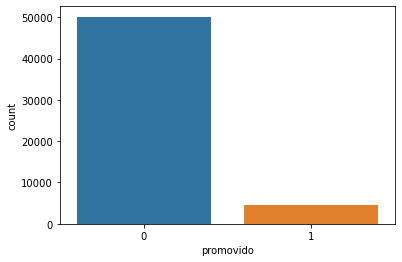

In [229]:
#Gráfico mostrando a proporção entre promovidos e não promovidos

sns.countplot(df['promovido'])

In [230]:
#Dividindo os dados em grupos

df_classe_majoritaria =  df[df.promovido==0]
df_classe_minoritaria =  df[df.promovido==1]

In [231]:
#Shape da classe majoritária

df_classe_majoritaria.shape

(50140, 11)

In [232]:
#Shape da classe minoritária

df_classe_minoritaria.shape

(4668, 11)

In [233]:
#Fazer amostras sintéticas através do UpSample do Sklearn e, assim, igualar o número de amostras entre promovidos e não

from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, replace = True, n_samples = 50140, random_state = 150)

In [234]:
#Concatenar os dados após atuação do UpSample

df_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [235]:
#Mostrar os dados após UpSample

df_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [236]:
df_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

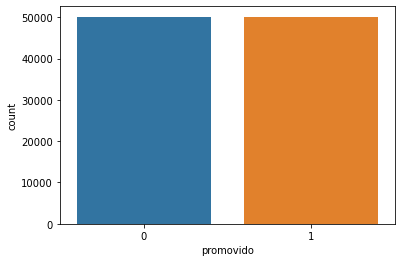

In [237]:
sns.countplot(df_balanceados['promovido'])

Salvando o dataset após manipulação

In [238]:
#Salvando em CSV

df_balanceados.to_csv('dadosRH_balanceado.csv', encoding = 'utf-8', index = False)

# Respondendo as questões do problema a ser resolvido

In [239]:
#Importando o dataset trabalhado

dataset = pd.read_csv("dadosRH_balanceado.csv")

In [240]:
#Mostrando o cabeçalho do dataset

dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [241]:
dataset.shape

(100280, 11)

### Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

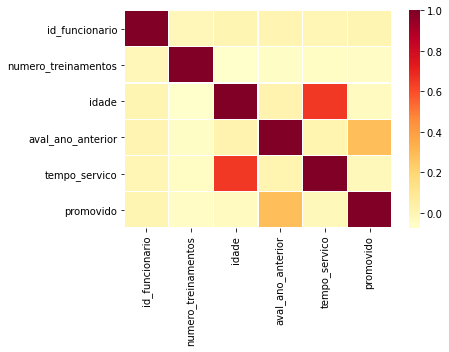

In [242]:
#Usaremos o heatmap para gerar essa resposta

import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

Pode-se notar que a relação da idade com tempo de serviço é grande, o que faz sentido; quanto mais idade, maior a probabilidade de estar na empresa
Além disso, também é visível a relação entre ter um aval no ano anterior e ser promovido.

### Pergunta 2 - Qual o tempo de serviço da maioria dos funcionários?

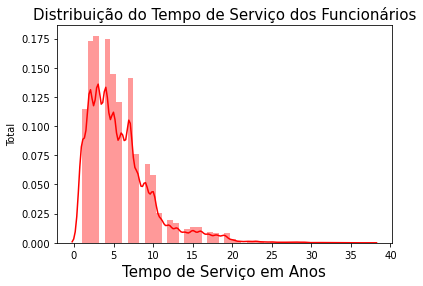

In [243]:
#Usaremos o distplot para ver a distribuição dos funcionários por tempo de serviço

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'red')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

Temos que a maioria dos funcionários permanecem entre 2 e 5 anos na empresa

### Pergunta 3 - Qual a Distribuição das Idades dos Funcionários?

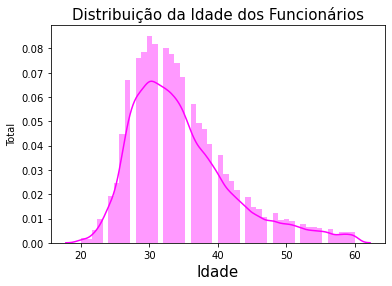

In [250]:
#Usaremos o gráfico de barras para ver a relação de idade de funcionários

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

Podemos ver que a maioria dos funcionários está na faixa entre 26 e 35 anos

### Pergunta 4 - Qual o Número de Treinamentos Mais Frequente?

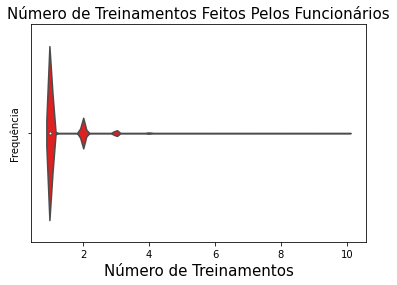

In [245]:
#Usaremos o gráfico de violino para ver o número de treinamento feito por funcionários

import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

Pode-se perceber que a maioria realizou apenas 1 treinamento ofertado

### Pergunta 5 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

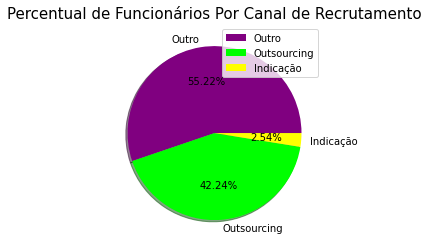

In [246]:
#Utilização do gráfico de pizza para ver como se dá o recrutamento na empresa

import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

A maioria dos funcionários foram recrutadas de outra forma que outsourcing e indicação, sendo essa última a menos utilizada.

### Pergunta 6 - Qual Avaliação do Ano Anterior Foi Mais Comum?

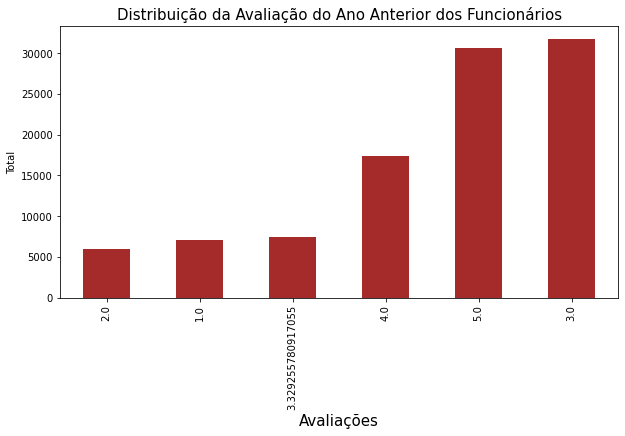

In [247]:
#Utilizando do gráfico de barras para responder a avaliação mais comum emprega

import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'brown', figsize = (10, 5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

Pode-se notar que o valor 3.32... é a média dos valores empregada em células ausentes na coluna e que a grande maioria está na média de notas de 0 a 5.

### Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

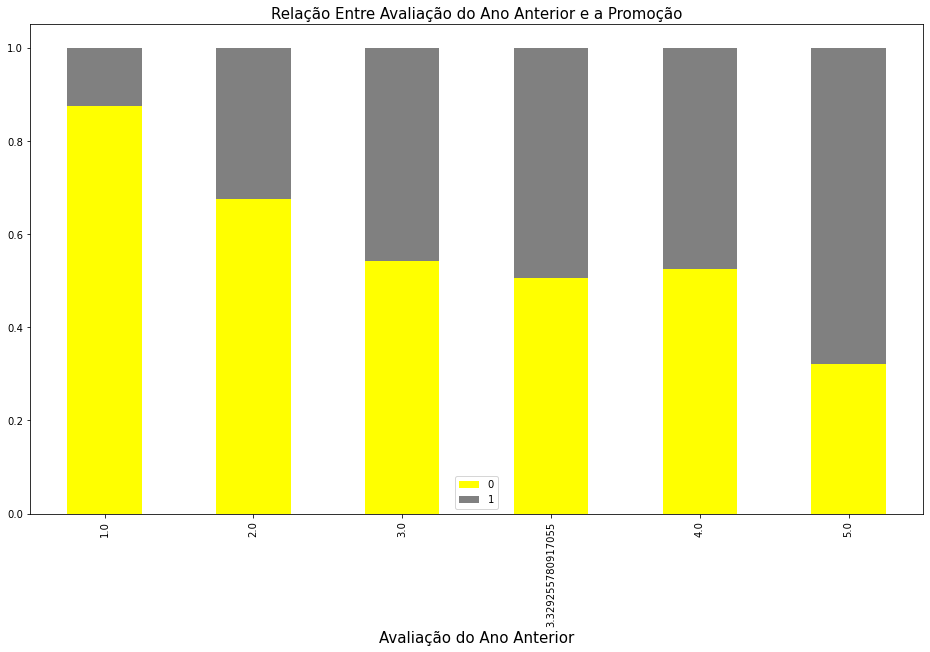

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (16, 9), 
                                                   color = ['yellow', 'grey'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

Pode-se notar que quanto maior a nota no ano anterior maior é as chances de promoção, o que mostra um ambiente de meritocracia na empresa.

# Visualização dos Gráficos Gerados em Python em Dashboard do Power BI

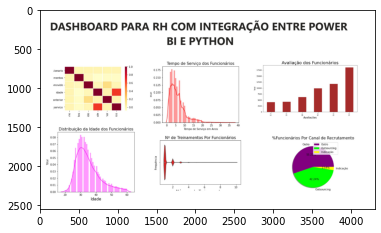

In [253]:
#Os gráficos produzidos em Python foram importados em Power BI e, asssim, criado um dashboard

import matplotlib.image as mpimg
img = mpimg.imread('DashboardEmPython.jpg')
imgplot = plt.imshow(img)
plt.show()